In [49]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [2]:
dataset = pd.read_csv("data.csv")

In [3]:
dataset.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
dataset.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [5]:
dataset.isnull().any()

id                         False
diagnosis                  False
radius_mean                False
texture_mean               False
perimeter_mean             False
area_mean                  False
smoothness_mean            False
compactness_mean           False
concavity_mean             False
concave points_mean        False
symmetry_mean              False
fractal_dimension_mean     False
radius_se                  False
texture_se                 False
perimeter_se               False
area_se                    False
smoothness_se              False
compactness_se             False
concavity_se               False
concave points_se          False
symmetry_se                False
fractal_dimension_se       False
radius_worst               False
texture_worst              False
perimeter_worst            False
area_worst                 False
smoothness_worst           False
compactness_worst          False
concavity_worst            False
concave points_worst       False
symmetry_w

In [6]:
del dataset["Unnamed: 32"]

In [7]:
dataset.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [8]:
features = dataset.drop("diagnosis", axis=1)
labels = dataset["diagnosis"]

In [9]:
features.head()
del features["id"]

In [10]:
corr = features.corr()
corr.style.background_gradient()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
radius_mean,1,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,0.67909,-0.0973174,0.674172,0.735864,-0.2226,0.206,0.194204,0.376169,-0.104321,-0.0426413,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.00706589
texture_mean,0.323782,1,0.329533,0.321086,-0.0233885,0.236702,0.302418,0.293464,0.071401,-0.0764372,0.275869,0.386358,0.281673,0.259845,0.00661378,0.191975,0.143293,0.163851,0.00912717,0.0544575,0.352573,0.912045,0.35804,0.343546,0.0775034,0.27783,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.997855,0.329533,1,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,0.691765,-0.0867611,0.693135,0.744983,-0.202694,0.250744,0.228082,0.407217,-0.0816293,-0.00552339,0.969476,0.303038,0.970387,0.94155,0.150549,0.455774,0.563879,0.771241,0.189115,0.0510185
area_mean,0.987357,0.321086,0.986507,1,0.177028,0.498502,0.685983,0.823269,0.151293,-0.28311,0.732562,-0.0662802,0.726628,0.800086,-0.166777,0.212583,0.20766,0.37232,-0.0724966,-0.019887,0.962746,0.287489,0.95912,0.959213,0.123523,0.39041,0.512606,0.722017,0.14357,0.0037376
smoothness_mean,0.170581,-0.0233885,0.207278,0.177028,1,0.659123,0.521984,0.553695,0.557775,0.584792,0.301467,0.0684064,0.296092,0.246552,0.332375,0.318943,0.248396,0.380676,0.200774,0.283607,0.21312,0.0360718,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.506124,0.236702,0.556936,0.498502,0.659123,1,0.883121,0.831135,0.602641,0.565369,0.497473,0.0462048,0.548905,0.455653,0.135299,0.738722,0.570517,0.642262,0.229977,0.507318,0.535315,0.248133,0.59021,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1,0.921391,0.500667,0.336783,0.631925,0.0762183,0.660391,0.617427,0.0985637,0.670279,0.69127,0.68326,0.178009,0.449301,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.51493
concave points_mean,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1,0.462497,0.166917,0.69805,0.0214796,0.71065,0.690299,0.0276533,0.490424,0.439167,0.615634,0.0953508,0.257584,0.830318,0.292752,0.855923,0.80963,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1,0.479921,0.303379,0.128053,0.313893,0.22397,0.187321,0.421659,0.342627,0.393298,0.449137,0.331786,0.185728,0.0906507,0.219169,0.177193,0.426675,0.4732,0.433721,0.430297,0.699826,0.438413
fractal_dimension_mean,-0.311631,-0.0764372,-0.261477,-0.28311,0.584792,0.565369,0.336783,0.166917,0.479921,1,0.000110995,0.164174,0.0398299,-0.0901702,0.401964,0.559837,0.44663,0.341198,0.345007,0.688132,-0.253691,-0.0512692,-0.205151,-0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297


<i> We can see that there exists a good amount of correlation between the features </i>
<i> The number of features are a lot so using pca we can reduce them </i>

In [11]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [12]:
len(scaled_features)

569

In [13]:
len(scaled_features[0])

30

In [14]:
# PCA
pcaw = PCA()
pcaw.fit(scaled_features)
pca_projection = pcaw.transform(scaled_features)

In [15]:
len(pca_projection[0])

30

In [16]:
variance = pcaw.explained_variance_ratio_
variance

array([4.42720256e-01, 1.89711820e-01, 9.39316326e-02, 6.60213492e-02,
       5.49576849e-02, 4.02452204e-02, 2.25073371e-02, 1.58872380e-02,
       1.38964937e-02, 1.16897819e-02, 9.79718988e-03, 8.70537901e-03,
       8.04524987e-03, 5.23365745e-03, 3.13783217e-03, 2.66209337e-03,
       1.97996793e-03, 1.75395945e-03, 1.64925306e-03, 1.03864675e-03,
       9.99096464e-04, 9.14646751e-04, 8.11361259e-04, 6.01833567e-04,
       5.16042379e-04, 2.72587995e-04, 2.30015463e-04, 5.29779290e-05,
       2.49601032e-05, 4.43482743e-06])

<BarContainer object of 30 artists>

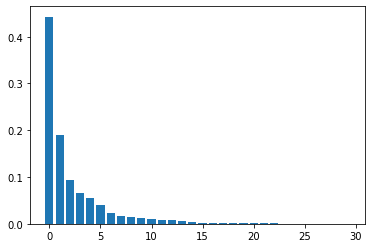

In [17]:
plt.bar(range(30), variance)

In [19]:
# looking at the graph, I think 12 features would be able to capture the major of the data
num = 12
pca = PCA(num, random_state=20)
pca.fit(scaled_features)
projection_pca = pca.transform(scaled_features)

In [20]:
len(projection_pca[0])

12

In [21]:
exp_variance = pca.explained_variance_ratio_

Text(0, 0.5, 'Variance')

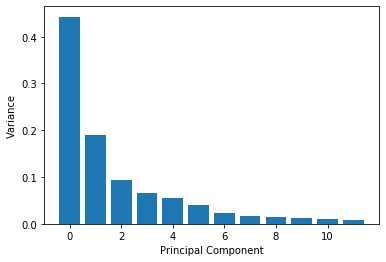

In [24]:
plt.bar(range(12), exp_variance)
plt.xlabel("Principal Component")
plt.ylabel("Variance")

In [26]:
X_train, X_test, y_train, y_test = train_test_split(projection_pca, labels, test_size = 0.25, random_state=5)

In [28]:
tree = DecisionTreeClassifier(random_state=5)
tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=5)

In [29]:
predictions = tree.predict(X_test)

In [30]:
predictions

array(['M', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'B', 'B', 'M',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'M', 'B',
       'B', 'M', 'B', 'M', 'M', 'M', 'M', 'M', 'B', 'B', 'M', 'B', 'B',
       'M', 'B', 'B', 'B', 'M', 'B', 'B', 'M', 'M', 'B', 'M', 'B', 'B',
       'B', 'B', 'B', 'M', 'M', 'M', 'B', 'M', 'M', 'M', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'M', 'B', 'M', 'B', 'B', 'M', 'B', 'M', 'B',
       'M', 'M', 'M', 'B', 'M', 'M', 'M', 'B', 'M', 'B', 'M', 'M', 'M',
       'M', 'B', 'B', 'M', 'M', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'B',
       'M', 'M', 'B', 'M', 'B', 'M', 'B', 'M', 'M', 'M', 'B', 'B', 'M',
       'B', 'M', 'B', 'B', 'B', 'M', 'B', 'M', 'B', 'M', 'B', 'B', 'M',
       'B', 'B', 'B', 'M', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'M'],
      dtype=object)

In [32]:
accuracy_score(y_true=y_test, y_pred=predictions)

0.951048951048951

In [50]:
tree_report = classification_report(y_test, predictions)
print(tree_report)

              precision    recall  f1-score   support

           B       0.98      0.94      0.96        88
           M       0.91      0.96      0.94        55

    accuracy                           0.95       143
   macro avg       0.95      0.95      0.95       143
weighted avg       0.95      0.95      0.95       143



## Using Data without PCA

In [43]:
X_train_w, X_test_w, y_train_w, y_test_w = train_test_split(features, labels, test_size = 0.25, random_state=5)

In [44]:
tree_two = DecisionTreeClassifier(random_state=5)

In [45]:
tree_two.fit(X_train_w, y_train_w)

DecisionTreeClassifier(random_state=5)

In [46]:
predictions_w = tree_two.predict(X_test_w)

In [47]:
predictions_w

array(['M', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'M',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'M', 'B',
       'B', 'M', 'B', 'M', 'M', 'M', 'M', 'M', 'B', 'B', 'M', 'B', 'B',
       'M', 'B', 'B', 'B', 'M', 'B', 'B', 'M', 'M', 'B', 'M', 'B', 'B',
       'B', 'B', 'B', 'M', 'M', 'M', 'B', 'M', 'M', 'M', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'M', 'B', 'M', 'B', 'B', 'B', 'B', 'M', 'B',
       'M', 'M', 'M', 'B', 'M', 'M', 'M', 'B', 'M', 'B', 'M', 'M', 'M',
       'M', 'B', 'B', 'M', 'M', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'B',
       'B', 'M', 'B', 'M', 'B', 'B', 'B', 'M', 'M', 'B', 'B', 'M', 'M',
       'B', 'M', 'B', 'B', 'B', 'M', 'B', 'M', 'B', 'M', 'B', 'B', 'M',
       'B', 'B', 'B', 'M', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B'],
      dtype=object)

In [48]:
accuracy_score(y_true=y_test_w, y_pred=predictions_w)

0.9440559440559441

In [51]:
tree_two_report = classification_report(y_test_w, predictions_w)
print(tree_two_report)

              precision    recall  f1-score   support

           B       0.94      0.97      0.96        88
           M       0.94      0.91      0.93        55

    accuracy                           0.94       143
   macro avg       0.94      0.94      0.94       143
weighted avg       0.94      0.94      0.94       143



<i> The accuracy of the model was improved by using PCA </i>